<a href="https://colab.research.google.com/github/nandrom/senalesIII/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO FINAL (CLUSTERING)

Andres Mauricio Roman Toro

Luis Adrian Cardona Lopez

Prof. Hernán Felipe García Arias

Facultad de Ingeniería

Universidad de Antioquia

2021-2

### INTRODUCCION

Sin duda alguna, la inteligencia computacional es una herramienta que cada vez toma más fuerza y brinda mayor utilidad. A medida que la era digital se fue globalizando y ha evolucionado, la inteligencia artificial y el desarrollo de procesos sistemáticos de forma automática; se han convertido en una necesidad para el desarrollo de casi cualquier tipo de actividad que requiera de recopilación de información digital, agrupamiento, análisis y clasificación de la misma, con el fin poder procesar e interpretar la información que realmente tenga contenido de interés y  utilidad para la toma de decisiones, de acuerdo a cada proceso especifico.
Actualmente, existe aplicación de este tipo de inteligencia en innumerables procesos, sin embargo, a través de este proyecto nos centraremos en abordar un campo donde se ha venido implementando con  resultados exitosos la inteligencia artificial como es el caso de la medicina y lo abordaremos específicamente desde el diagnostico de enfermedades como el cáncer, ya que en la actualidad se requieren de mecanismos automáticos que puedan interpretar de manera oportuna una gran cantidad de información obtenida a partir de exámenes y demás diagnósticos mediante los cuales se crean bases de datos que contienen diferentes características de grupos de células, estas características nos servirán para implementar un algoritmo de agrupamiento  como lo hace el clustering. Nos centraremos en el desarrollo del método de aprendizaje no supervisado como lo es  Kmeans, a partir del cual pretendemos  realizar una análisis de la información recopilada en la base de datos disponible, con la finalidad de desarrollar un algoritmo para  encontrar de manera ágil y acertada la cantidad de pacientes sanos o con presencia células cancerígenas; gracias a que este método nos permite agrupar toda esta información basado en índices de similitud para encontrar las características relevantes o que realmente nos brinden información valiosa, obteniendo un algoritmo inteligente mediante un proceso de entrenamiento que al final le brindaran la capacidad de arrojar resultados muy acertados acerca de toda la información disponible en la base de datos analizada.

## DATA SET

Para el desarrollo del proyecto, trabajaremos con una base de datos disponible en el siguiente repositorio: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data


La información que contiene esta base de datos hace referencia a valores medidos en células, los cuales se analizaron para diagnosticar si una persona tiene presencia o no de células cancerígenas en su organismo.


## DESARROLLO
Empezaremos importando las librerías que nos harán falta para el desarrollo del algoritmos como matplotlib, pandas, skalearn (clusters y descomposición)

In [1]:
import numpy as np                     # Procesamiento numerico
import matplotlib.pyplot as plt        # graficos
import pandas as pd                    # Creacion y manejo de dataframes

from sklearn.cluster import KMeans     # para el clustering k-means
from sklearn.decomposition import PCA  # libreria para determinar las variables mas representativas

# Caracteristicas del dataset usado

Caracteristicas del dataset usado
Definimos las variables que serán de utilidad, basados en la conformación de la base de datos disponible, además, los datos se dividirán en dos categorías: 70% datos de entrenamiento y 30% datos de prueba, con el fin de definir un buen criterio de generalización.



In [2]:
num_datos = 699                        # cantidad de datos (muestras)
dent = int(num_datos*0.7)+1            # datos de entrenamiento   (verificar la cantidad de dtos para hacer la particion)
dpru = int(num_datos*0.3)              # datos de prueba
num_x = 9                              # numero de variables (caracteristicas)

kmax = 11                              # numero de clusters (se utilizara el algoritmo con diferente numero de clusters, esta variable determina el numero maximo de clusters, es necesario especificar el # maximo de clusters + 1)
itera = 300                            # numero maximo de iteraciones
tolerancia = 1e-6                      # tolerancia para la convergencia del algoritmo 

# Lectura del dataset

In [3]:
Datos = pd.read_excel('Datos.xlsx',dtype=int)         # leer el archivo de excel
df = pd.DataFrame(Datos)                              # Crear dataframe de los datos (matriz)
df.columns=["Id","D1","D2","D3","D4","D5","D6","D6","D8","D9","Cancer/No cancer"]
df2=df.drop("Id",axis=1)
df=df2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   D1                698 non-null    int64
 1   D2                698 non-null    int64
 2   D3                698 non-null    int64
 3   D4                698 non-null    int64
 4   D5                698 non-null    int64
 5   D6                698 non-null    int64
 6   D6                698 non-null    int64
 7   D8                698 non-null    int64
 8   D9                698 non-null    int64
 9   Cancer/No cancer  698 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [4]:
df

,D1,D2,D3,D4,D5,D6,D6,D8,D9,Cancer/No cancer
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


# Se normaliza el dataset

Debido a que existen valores demasiado grandes y que al compararlos con otros pueden generan una interminación en el algoritmo, se debe realizar el proceso de normalización del data set, La normalización otorga valores a los datos entre cero y uno, de esta manera se espera que las características se distribuyan entre 0 y 1, que nos pueden además dar información acerca de las clases es decir, (1) células normales y (0) célula con cáncer.
Para normalizar el data set, se hará uso de la siguiente ecuación:  

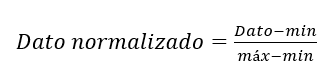

In [5]:
#---------------------- normalizacion -----------------------------------------------------------------
def norm(df):                                         # Definicion de funcion de normalizacion
    return (df - df.min()) / ( df.max() - df.min())   # normalizacion

dfnorm = norm(df)                                     # llamado de la funcion normalizacion
dfnorm.to_excel("Datos normalizados.xlsx")            # se guardan los datos normalizados en un archivo de excel

#------ Visualizacion para verificar la normalizacion correcta ----------------------------------------

# ax = df['D6'].plot.hist(bins=20)
# ax.set_xlabel('Valores')
# ax.set_title('D1')
# plt.show()

# bx = dfnorm['D6'].plot.hist(bins=20)
# bx.set_xlabel('Valores')
# bx.set_title('D1')
# plt.show()

dfnorm

,D1,D2,D3,D4,D5,D6,D6,D8,D9,Cancer/No cancer
0,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0.0
1,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0.0
2,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,0.0
3,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
4,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
693,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,0.0
694,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0
695,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,1.0
696,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,1.0


# Se asignan los datos de entrenamiento y los de prueba

In [6]:
X = dfnorm.iloc[:,0:num_x]                    # creando el data frame de las caracteristicas
Y = dfnorm.iloc[:,num_x:num_x+1]              # Creando el data frame de las salidas esperadas Y
 
# Particion de datos
Xent = X.iloc[0:dent,:]                       # Datos de entrenamiento (caracteristicas)
Yent = Y.iloc[0:dent,:]                       # Datos de entrenamiento (salidas esperadas)

Xpru = X.iloc[dent:dent+dpru,:]               # Datos de prueba (caracteristicas)
Ypru = Y.iloc[dent:dent+dpru,:]               # Datos de prueba (salidas esperadas)

# Asignacion del cluster
Uno de los problemas que nos encontramos a la hora de aplicar alguno de los métodos de Clustering (K-means o EM) es la elección del número de Clusters. No existe un criterio objetivo ni ampliamente válido para la elección de un número óptimo de Clusters; pero debemos tener en cuenta, que una mala elección de los mismos puede dar lugar a realizar agrupaciones de datos muy heterogéneos (pocos Clusters); o datos, que siendo muy similares unos a otros los agrupemos en Clusters diferentes (muchos Clusters). Para el desarrollo de nuestro algoritmo haremos iteración hasta llegar a 10 clusters, sin embargo, más adelante veremos gráficamente a partir el método de inercia o también conocido como codo de JAMBU, cual es el número de clusters ideal para nuestro análisis puntual y también como va cambiando la información y los resultados a medida que van cambiando el número de clusters.

In [7]:
def correspondencia (salidas,yesp,ndatos):                 # definicion de funcion para la correspondencia

    vceros = np.zeros(ndatos)                              # vector de ceros 
    nuevoslabel = pd.Series(vceros)                        # se crea una serie con el vector de ceros para añadirlo al data frame de correspondencia
    
    #cor es el dataframe donde analizamos la correspondecia de las clases obtenidas
    cor = pd.concat([salidas,yesp,nuevoslabel],axis=1)     # concatenamos los dataframe que necesitamos en el dataframe de correspondencia
    cor.columns = ['yobt','yesp','ynuevo']                 # renombramos las columnas del dataframe creado
    
    cont = [0,0,0,0,0,0,0,0,0,0]                           # Vector para almacenar la cantidad de datos que se encuentran en cada cluster
    unos = [0,0,0,0,0,0,0,0,0,0]                           # Vector para almacenar la cantidad de unos (label) q se encuentran en cada cluster, los unos de miran el los yesperados
    ceros = [0,0,0,0,0,0,0,0,0,0]                          # vector para almacenar la cantidad de ceros (label)
    
    
    for i in range (ndatos):                               # ciclo para recorrer todos los datos
        if (cor.loc[i,'yobt'] == 0):                       # condicion para determinar el cluster al q pertenece el dato
            cont[0] = cont[0] + 1                          # contabilizacion de la cantidad de datos del cluster
            if (cor.loc[i,'yesp'] == 1):                   # condicion para determinar si el dato en el cluster corresponde a un 1 de los Yesperados
                unos[0] = unos[0] + 1                      # contabilizacion de los unos del cluster
                
        if (cor.loc[i,'yobt'] == 1):
            cont[1] = cont[1] + 1
            if (cor.loc[i,'yesp'] == 1):
                unos[1] = unos[1] + 1
        
        if (cor.loc[i,'yobt'] == 2):
            cont[2] = cont[2] + 1
            if (cor.loc[i,'yesp'] == 1):
                unos[2] = unos[2] + 1
        
        if (cor.loc[i,'yobt'] == 3):
            cont[3] = cont[3] + 1
            if (cor.loc[i,'yesp'] == 1):
                unos[3] = unos[3] + 1
        
        if (cor.loc[i,'yobt'] == 4):
            cont[4] = cont[4] + 1
            if (cor.loc[i,'yesp'] == 1):
                unos[4] = unos[4] + 1
                
        if (cor.loc[i,'yobt'] == 5):
            cont[5] = cont[5] + 1
            if (cor.loc[i,'yesp'] == 1):
                unos[5] = unos[5] + 1
                
        if (cor.loc[i,'yobt'] == 6):
            cont[6] = cont[6] + 1
            if (cor.loc[i,'yesp'] == 1):
                unos[6] = unos[6] + 1
                
        if (cor.loc[i,'yobt'] == 7):
            cont[7] = cont[7] + 1
            if (cor.loc[i,'yesp'] == 1):
                unos[7] = unos[7] + 1
        
        if (cor.loc[i,'yobt'] == 8):
            cont[8] = cont[8] + 1
            if (cor.loc[i,'yesp'] == 1):
                unos[8] = unos[8] + 1
        
        if (cor.loc[i,'yobt'] == 9):
            cont[9] = cont[9] + 1
            if (cor.loc[i,'yesp'] == 1):
                unos[9] = unos[9] + 1
         
    ceros[0] = cont[0] - unos[0]                        # Determinacion de la correspondencia de los ceros del cluster
    ceros[1] = cont[1] - unos[1]
    ceros[2] = cont[2] - unos[2]
    ceros[3] = cont[3] - unos[3]
    ceros[4] = cont[4] - unos[4]
    ceros[5] = cont[5] - unos[5]
    ceros[6] = cont[6] - unos[6]
    ceros[7] = cont[7] - unos[7]
    ceros[8] = cont[8] - unos[8]
    ceros[9] = cont[9] - unos[9]
    
    for i in range (ndatos):                            # ciclo para recorrer todos los datos
        if (cor.loc[i,'yobt'] == 0):                    # condicion para determinar en q cluster me encuentro
            if  unos[0] >= ceros[0]:                    # condicion de correspondencia, en caso de que existan mas unos que ceros en la correspondecia del cluster con el Yesp, dicho cluster se tomara como del grupo 1, en caso contrario del grupo 2
                cor.loc[i,'ynuevo'] = 1                 # se modifica el label del el dataframe de correspondencia
        if (cor.loc[i,'yobt'] == 1):       
            if  unos[1] >= ceros[1]:
                cor.loc[i,'ynuevo'] = 1
        if (cor.loc[i,'yobt'] == 2):
            if  unos[2] >= ceros[2]:
                cor.loc[i,'ynuevo'] = 1
        if (cor.loc[i,'yobt'] == 3):
            if  unos[3] >= ceros[3]:
                cor.loc[i,'ynuevo'] = 1
        if (cor.loc[i,'yobt'] == 4):
            if  unos[4] >= ceros[4]:
                cor.loc[i,'ynuevo'] = 1
        if (cor.loc[i,'yobt'] == 5):
            if  unos[5] >= ceros[5]:
                cor.loc[i,'ynuevo'] = 1
        if (cor.loc[i,'yobt'] == 6):
            if  unos[6] >= ceros[6]:
                cor.loc[i,'ynuevo'] = 1
        if (cor.loc[i,'yobt'] == 7):
            if  unos[7] >= ceros[7]:
                cor.loc[i,'ynuevo'] = 1
        if (cor.loc[i,'yobt'] == 8):
            if  unos[8] >= ceros[8]:
                cor.loc[i,'ynuevo'] = 1
        if (cor.loc[i,'yobt'] == 9):
            if  unos[9] >= ceros[9]:
                cor.loc[i,'ynuevo'] = 1
    
    return(cor)                             # se retorna el dataframe de correspondencia

# PCA para la visualizacion de las variables en 2D

Recordemos que PCA (Principal Component Analysis) es una técnica de Extracción de Características donde combinamos las entradas de una manera específica y podemos eliminar algunas de las variables “menos importantes” manteniendo la parte más importante todas las variables. Esto será necesario ya que por ejemplo al tener 10 características tendríamos 10 dimensiones diferentes y si pretendemos interpretar los resultados gráficamente, entonces, necesitamos aplicar un método que nos permita reagrupar toda esta información en 2 dimensiones o eliminar algunas características de poca importancia para nuestro análisis y al final analizar las 2 dimensiones resultantes en las graficas 2D, tal como lo realizaremos a continuación.

In [8]:
#%% visualizacion de los clusters - tecnica de reduccion de dimenciones, para seleccionar las variable mas relevantes

pca = PCA(n_components = 2)                                                            # creacion del modelo PCA para dos componentes (los principales)                                                  
pca_cancer = pca.fit_transform(Xent)                                                   # obtencion de los dos componentes principales
pca_cancer_df = pd.DataFrame(data = pca_cancer, columns=['componente1','componente2']) # creacion de un dataframe con los componentes principales


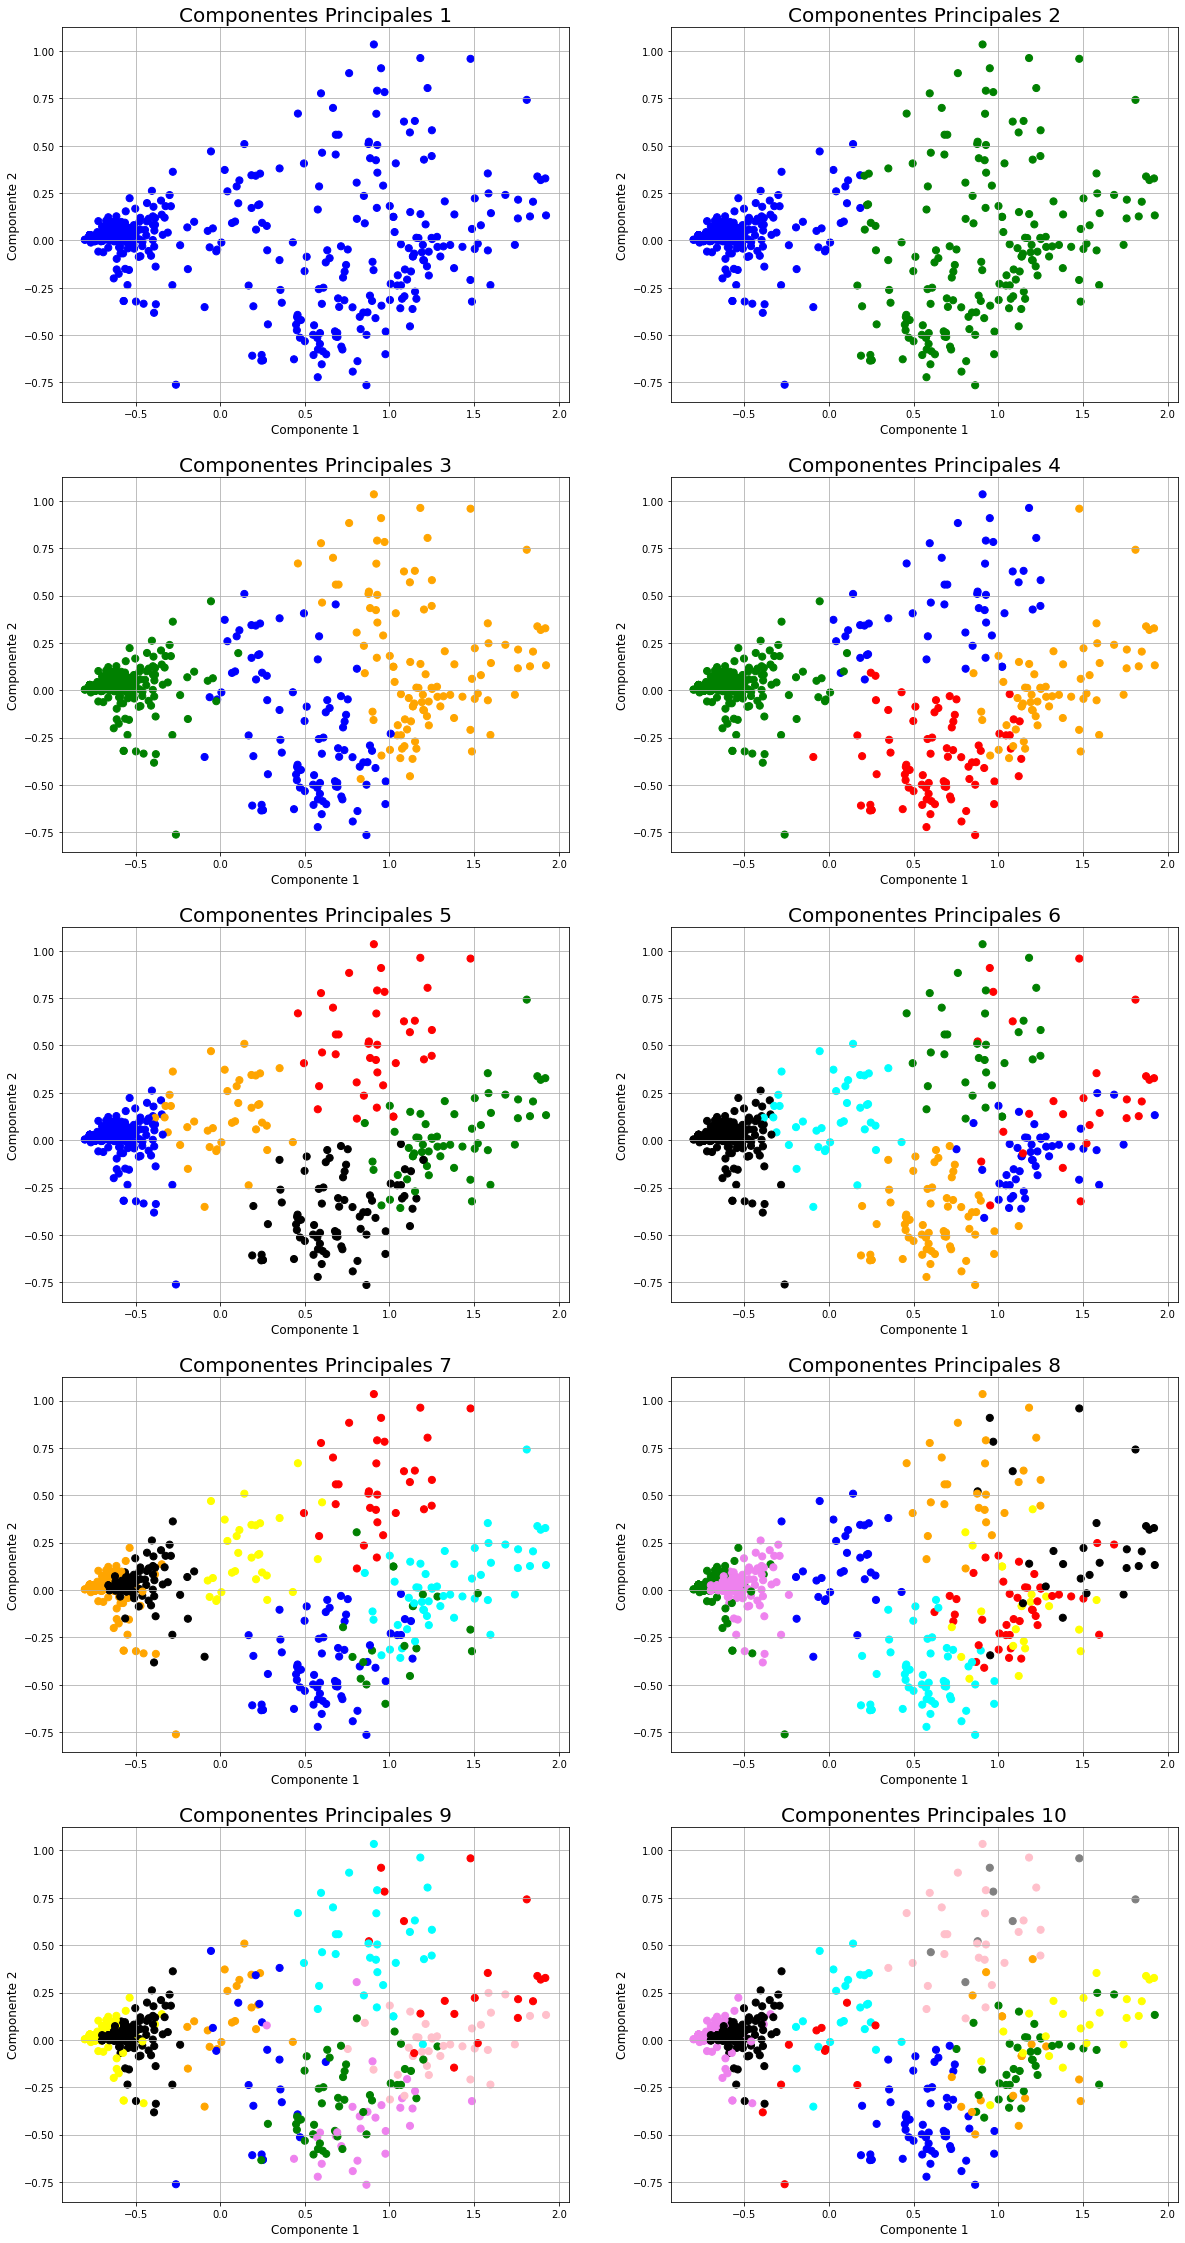

In [9]:
#%% K-means - para evaluar el desempeño ante diferentes numeros de clusters

# Codo de jambu: este metodo consiste en ir creando diferentes cantidades de clusters e ir calculando q tan similares son los individuos dentro de los mismos
# mientras mas similares sean estos, mas distante se encontraran los clusters que se formen. 
# wcss: es un indicador de que tan similares son los individuos dentro de los clusters
# se busca un punto en el q wcss deje de disminuir de manera drastica, dicho punto es el numero de clusters optimo

wcss = []            # vector vacio para guardar lo wcss - within clusters sum square (funcion de optimizacion)
iteraciones = []     # vector vacio para almacenar la cantidad de iteraciones que el algoritmo k-means usa para alcanzar el minimo de tolerancia convergencia del algoritmo
Eerrores = []        # vector vacio para almacenar la cantidad de errores
Eperrores = []       # vector vacio para almacenar los porcentajes de errores de entrenamiento 
Perrores = []        # vector vacio para almacenar la cantidad de errores
Pperrores = []       # vector vacio para almacenar los porcentajes de errores de prueba 

plt.figure(figsize=(20,40))                                 # creacion de una figura para darnos una idea de como estan separados nuestros datos basados en los dos componentes principales elegidos
                                               
for k in range (1,kmax):                                       # ciclo para evaluar el desempeño segun la cantidad de clusters
    clustering = KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = itera, tol = 1e-6, algorithm = 'full')  # se crea un modelo de k-means, segun la cantidad de clusters que deseo
    clustering.fit(Xent)                                     # se aplica el modelo a la base de datos (entrenamiento)
    wcss.append(clustering.inertia_)                         # se agrega el valor de los wcss que se encuentran en .inertia_ al vector WCSS (funcion de optimizacion)
    
    salidas = pd.DataFrame(data = clustering.labels_, columns=['clusters']) # se crea un data frame para almacenar los label de los datos analaizados correspondientes a los clusters

    cor = correspondencia(salidas,Yent,dent)                 # Se usa la funcion de correspondecia, para organizar los labels

    e = 0                                                    # inicializacion del contador de errores
    for i in range (dent):                                   # ciclo para recorrer los datos de entrenamiento
        if (cor.loc[i,'yesp'] != cor.loc[i,'ynuevo']):       # condicion para determinar la cantidad de errores
            e = e + 1                                        # contador de errores
    
    pe = (e*100)/dent                                        # calculo del porcentaje de error de entrenamiento
    
    Eerrores.append(e)                                       # guardamos los errores que se den segun la cantidad de clusters en el vector
    Eperrores.append(pe)                                     # guardamos el porcentaje error que se presente segun la cantidad de clusters en el vector
    iteraciones.append(clustering.n_iter_)                   # guardamos la cantidad de iteraciones q se den segun la cantidad de clusters en el vector 
    
    # prueba
    prediccion = pd.DataFrame(data = clustering.predict(Xpru), columns=['clusters']) # se crea un data frame para almacenar la prediccion con los datos de prueba
    Ypru.reset_index(drop=True,inplace=True)                 # se hace un reset a los index de los Y de prueba
    
    cor1 = correspondencia(prediccion,Ypru,dpru)           # se usa la funcion correspondecia ARRELAR!!!
    
    ep = 0                                                   # inicializacion del contador de errores de prueba
    for i in range (dpru):                                   # ciclo para recorrer los datos de prueba
        if (cor1.loc[i,'yesp'] != cor1.loc[i,'ynuevo']):     # condicion para determinar la cantidad de errores
            ep = ep + 1                                      # contador de errores
    
    pep = (ep*100)/dpru                                      # calculo del porcentaje de error de entrenamiento
    
    Perrores.append(ep)                                      # guardamos los errores que se den segun la cantidad de clusters en el vector
    Pperrores.append(pep)                                    # guardamos el porcentaje error que se presente segun la cantidad de clusters en el vector
    
    
    pca_nombres_cancer = pd.concat([pca_cancer_df, salidas],axis = 1) # concatemos los dataframe de los componentes principales, con las salidas obtenidas del algoritmo k-means
    #graficas                       
    plt.subplot(5,2,k)                                      # se crea un suplot dentro de la figura para graficar
    color_theme = np.array(["blue","green","orange","red","black","cyan","yellow","violet","pink","grey"]) # se especifican los colores usados para especificar q datos pertenecen a que cluster
    plt.scatter(x=pca_nombres_cancer.componente1, y= pca_nombres_cancer.componente2, c=color_theme[pca_nombres_cancer.clusters], s= 50) # dibujo de los puntos correspondientes a los datos
    #cx.legend("cluster 1","cluster 2","cluster 3","cluster 4","cluster 5","cluster 6","cluster 7","cluster 8","cluster 9","cluster 10")
    plt.xlabel('Componente 1', fontsize = 12)
    plt.ylabel('Componente 2', fontsize = 12)
    plt.title('Componentes Principales '+str(k), fontsize =20)
    plt.grid()

# Resultados numericos
Una vez obtenida la informacion grafica, procedemos a mostrar la informacion de numerica basada en los porcentajes de error de prueba y de prediccion que se obtuvo al ejecutar nuestro algoritmo; informacion vital para concluir la efectividad del mismo y su aplicabilidad al problema que estamos abordando.

In [10]:
for k in range (1,kmax):
    print ('Numero de Clusters = ',k )
    print ('Error de entrenamiento',(Eperrores[k-1]),'%')
    print ('Error de prediccion',(Pperrores[k-1]),'%')
    print ()

Numero de Clusters =  1
Error de entrenamiento 39.795918367346935 %
Error de prediccion 22.48803827751196 %

Numero de Clusters =  2
Error de entrenamiento 5.918367346938775 %
Error de prediccion 0.4784688995215311 %

Numero de Clusters =  3
Error de entrenamiento 3.673469387755102 %
Error de prediccion 1.4354066985645932 %

Numero de Clusters =  4
Error de entrenamiento 4.489795918367347 %
Error de prediccion 1.4354066985645932 %

Numero de Clusters =  5
Error de entrenamiento 4.8979591836734695 %
Error de prediccion 0.4784688995215311 %

Numero de Clusters =  6
Error de entrenamiento 4.8979591836734695 %
Error de prediccion 0.4784688995215311 %

Numero de Clusters =  7
Error de entrenamiento 3.673469387755102 %
Error de prediccion 1.4354066985645932 %

Numero de Clusters =  8
Error de entrenamiento 3.4693877551020407 %
Error de prediccion 0.9569377990430622 %

Numero de Clusters =  9
Error de entrenamiento 3.4693877551020407 %
Error de prediccion 1.4354066985645932 %

Numero de Clust

# Criterio de validacion para el numero de clusters

Como se mencionó anteriormente, el criterio de validación de clusters se puede realizar aplicando el método conocido como codo de JAMBU, Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide como se describe en la siguiente ecuación
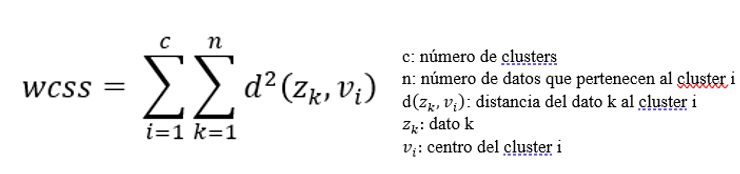
   
La interpretacion de dicha grafica, es que cuando apreciamos una cambio bruco en la evolucion del wcss (within clusters sum square), formara una figura como especie de codo, indicando a través de dicho punto el valor ideal de clusters para aplicar en el algoritmo. Para nuestro análisis particular es de esperar que el numero optimo de clusters sea 2, debido a que estamos enfocados en analizar si cada célula es o no cancerígena, por lo que esperamos poderlas clasificar en 2 posibles clases. Esta apreciación, la podremos corroborar en detalle mediante la gráfica obtenida.


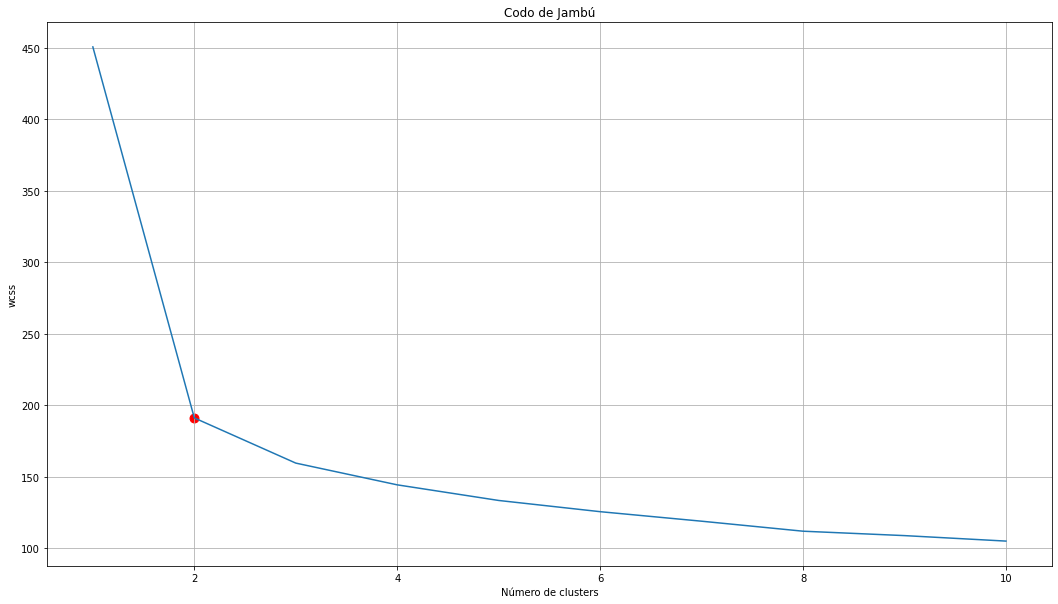

In [11]:
plt.figure(figsize=(18,10)) 
plt.plot(range(1, kmax), wcss)                                    # grafica del criterio para seleccionar la cantidad de clusters mas optima (wcss =  funcion de optimizacion)
plt.scatter(x=2,y=191,color='red',s=80)
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

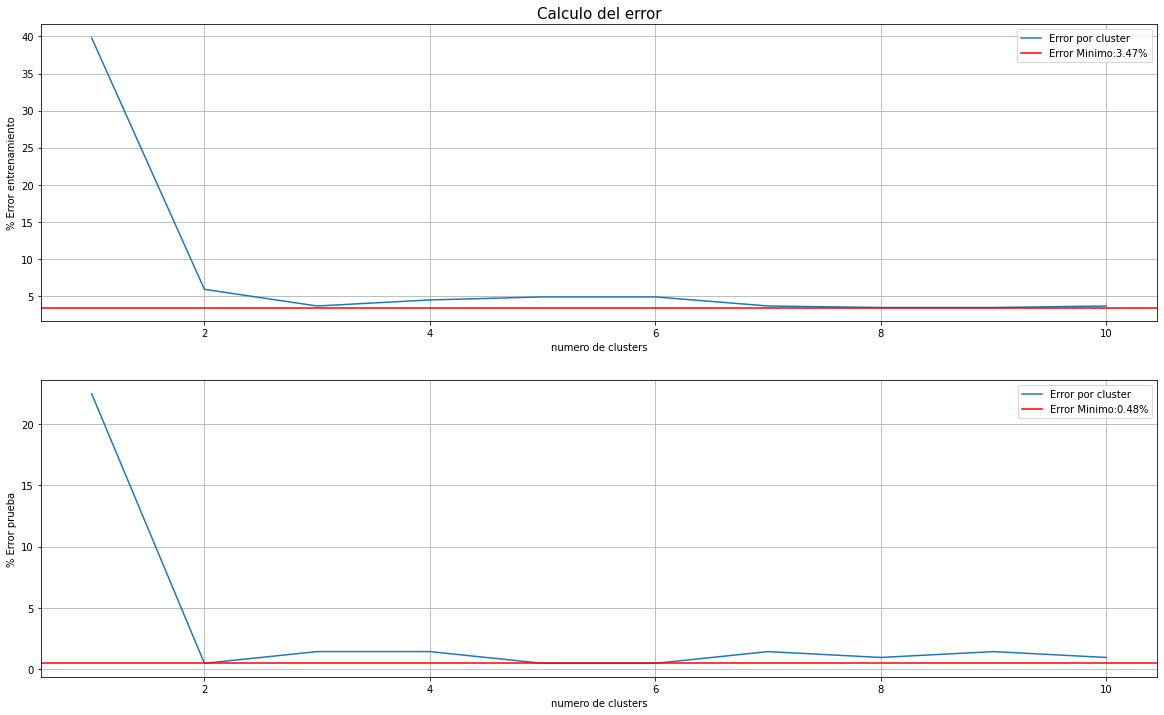

In [12]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title("Calculo del error",fontsize=15) 
plt.plot(range(1,kmax), Eperrores,label='Error por cluster')
plt.axhline(y=min(Eperrores),color='red',label='Error Minimo:'+str(round(min(Eperrores),2))+'%')
plt.legend(loc='best')
plt.xlabel("numero de clusters")
plt.ylabel("% Error entrenamiento")
plt.grid()

plt.subplot(212) 
plt.plot(range(1,kmax), Pperrores,label='Error por cluster')
plt.axhline(y=min(Pperrores),color='red',label='Error Minimo:'+str(round(min(Pperrores),2))+'%')
plt.legend(loc='best')
plt.xlabel("numero de clusters")
plt.ylabel("% Error prueba")
plt.grid()

## CONCLUSIONES

Al realizar un análisis tanto de las graficas como de los resultados numéricos obtenidos, podemos concluir que el modelo de predicción implementado es muy acertado, toda vez que el porcentaje de acierto del algoritmo en los diferentes números clusters estuvo siempre por encima del 99% excepto con Clusters = 1  donde el porcentaje de error representa un 22,5%; valor que tiene mucho sentido si pensamos los clusters como si fueran una clase, es decir si nuestro objetivo es diagnosticar si una célula es cancerígena o no, debemos tener mínimamente 2 clases, para lograr realizar dicha clasificación. Bajo este análisis, podemos observar que efectivamente el algoritmo ejecutado con un Clúster = 2, es el que presenta el menor error de predicción. Por otro lado si analizamos los resultados gráficos, podemos observar que efectivamente a medida que aumentamos el número de clusters, se van generando mas cantidad de subgrupos donde se van agrupando cada célula analizada según las características de similitud que se fueron encontrando durante la ejecución del algoritmo, por lo tanto, visualmente es muy fácil identificar  en la grafica de “Componentes Principales 2” (numero de clusters =2) como se realiza la agrupación de células cancerígenas y células sanas. Esta es otra de las razones que nos hablan de que el numero de Clusters indicado es 2, una vez más confirmando lo que obtuvimos según el criterio de validación mediante el codo de Jambu, el cual ya nos había indicado gráficamente que 2 era el numero óptimo de clusters. Si seguimos con el análisis gráfico, al aumentar el número de clusters no tendríamos una información concluyente de cuales células están sanas y cuales puesto que al aumentar los clusters, lo que hace el sistema es crear nuevos patrones de agrupamiento aún más específicas y por eso vemos que aun el sistema sigue siendo muy acertado, sin embargo ya no es información útil para nuestro propósito.


# MATERIAL DE APOYO

DATA SET

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data




SITIOS DE INTERES

https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/


https://www.aprendemachinelearning.com/7-pasos-machine-learning-construir-maquina/

https://www.youtube.com/watch?v=s6PSSzeUMFk

https://jarroba.com/seleccion-del-numero-optimo-clusters/

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
